<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/Fuzzy_System/basketball_player_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

In [ ]:
# https://www.kaggle.com/code/santoshbothe/fuzzy-logic-ds-kc

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedents and consequent

In [ ]:
# Chance to become a good basketball player (highschool age)
# New Antecedent/Consequent objects hold universe variables and membership
# functions
height = ctrl.Antecedent(np.arange(150, 211, 1), 'height')
talent = ctrl.Antecedent(np.arange(0,11,1), 'talent')
chance = ctrl.Consequent(np.arange(0,91,1), "chance")

## Membership functions

In [ ]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
height.automf(3)
talent.automf(3)

chance['low'] = fuzz.trimf(chance.universe, [0, 0, 45])
chance['medium'] = fuzz.trimf(chance.universe, [0, 45, 90])
chance['high'] = fuzz.trimf(chance.universe, [45, 90, 90])

In [ ]:
height['average'].view()

In [ ]:
talent.view()

In [ ]:
chance.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

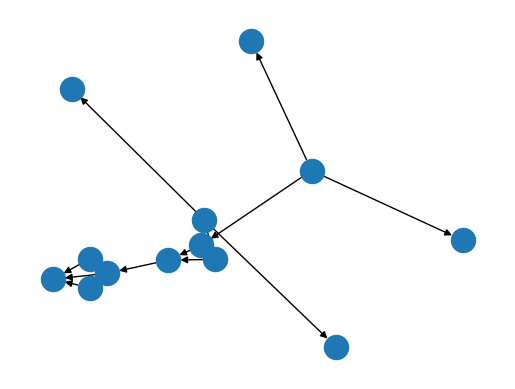

In [9]:
rule1 = ctrl.Rule(height['poor'] | talent['poor'], chance['low'])
rule2 = ctrl.Rule(height['average'], chance['medium'])
rule3 = ctrl.Rule(height['good'] | talent['good'], chance['high'])
rule1.view()

In [10]:
chance_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [11]:
chances = ctrl.ControlSystemSimulation(chance_ctrl)

In [12]:
chances.input["height"] = 175
chances.input["talent"] = 4

chances.compute()

44.15341545352747


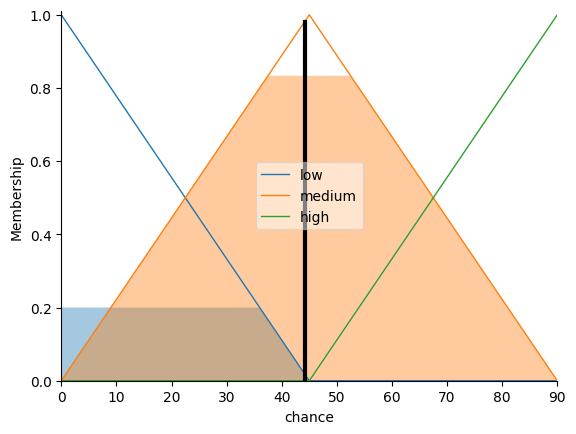

In [13]:
print(chances.output['chance'])
chance.view(sim=chances)